In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from google.colab import files
from sklearn.model_selection import train_test_split

In [3]:
uploadedFile = files.upload()

Saving Houses.csv to Houses.csv


In [12]:
data = pd.read_csv('Houses.csv', encoding='latin1')

In [11]:
data.columns

Index(['Unnamed: 0', 'address', 'city', 'floor', 'id', 'latitude', 'longitude',
       'price', 'rooms', 'sq', 'year'],
      dtype='object')

In [13]:
data

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
23759,23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,W³ochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  float64
 4   id          23764 non-null  float64
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  float64
 9   sq          23764 non-null  float64
 10  year        23764 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [15]:
data.isnull().sum()

Unnamed: 0    0
address       0
city          0
floor         0
id            0
latitude      0
longitude     0
price         0
rooms         0
sq            0
year          0
dtype: int64

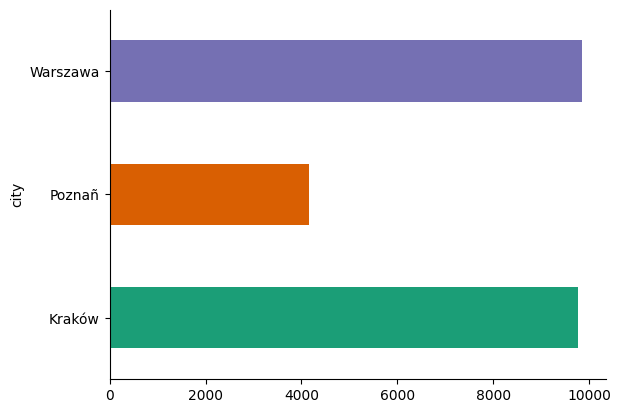

In [16]:
# @title city

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
data.describe()

,Unnamed: 0,floor,id,latitude,longitude,price,rooms,sq,year
count,23764.000000,23764.000000,23764.000000,23764.000000,23764.000000,2.376400e+04,23764.000000,2.376400e+04,23764.00000
mean,11881.500000,2.808744,15621.964484,51.374874,19.861773,6.493536e+05,2.620771,1.027249e+02,2000.55117
std,6860.220235,2.463467,8617.293898,1.099836,1.447186,5.326970e+05,0.996530,6.533688e+03,48.31402
min,0.000000,0.000000,1.000000,49.933056,4.204796,5.000000e+03,1.000000,8.800000e+00,70.00000
25%,5940.750000,1.000000,8420.750000,50.066489,19.916563,4.115461e+05,2.000000,4.200000e+01,1985.00000
50%,11881.500000,2.000000,15637.500000,52.193987,19.999330,5.200000e+05,3.000000,5.389500e+01,2019.00000
75%,17822.250000,4.000000,23111.250000,52.267594,20.996180,6.999990e+05,3.000000,6.891500e+01,2021.00000
max,23763.000000,10.000000,30308.000000,54.435238,30.319403,1.500000e+07,10.000000,1.007185e+06,2980.00000


<ipython-input-18-331dd13f2f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

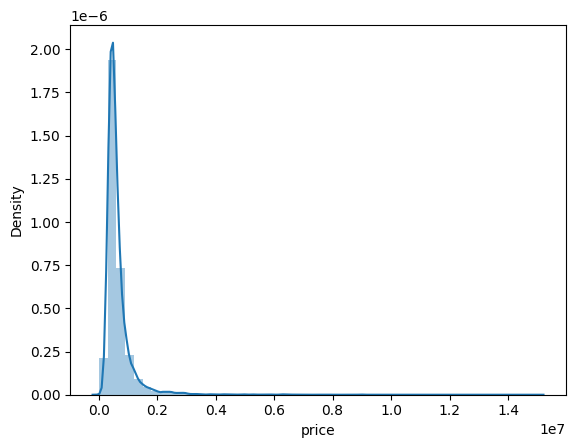

In [18]:
sns.distplot(data['price'])